In [6]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import set_matplotlib_formats
import glob
# %matplotlib inline
# set_matplotlib_formats('svg', 'png', 'pdf')
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27), 'savefig.dpi':400, 'savefig.bbox':'tight'})


In [7]:
def get_section_results_eval(file):
    steps = []
    eval_returns = []
    eval_stdRets = []
    eval_time = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Eval_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            if v.tag == 'Eval_StdReturn':
                eval_stdRets.append(v.simple_value)
            if v.tag == 'TimeSinceStart':
                eval_time.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns, eval_stdRets, eval_time]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Eval_AverageReturn', 'Eval_StdReturn', 'TimeSinceStart'])
    return data_df

def get_section_results_train(file):
    steps = []
    eval_returns = []
    # eval_time = []
    # env_steps = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            # if v.tag == 'Train_EnvstepsSoFar':
            #     env_steps.append(v.simple_value)
            # if v.tag == 'TimeSinceStart':
            #     eval_time.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Train_AverageReturn'])
    return data_df

def find_file(name, path='data/'):
    if isinstance(name, list):
        files = []
        for n in name:
            files.append(glob.glob('data/*'+n+'*/event*')[0])
        return files
    else:
        assert isinstance(name, str)
        return glob.glob('data/*'+name+'*/event*')

def draw_eval(file_name):
    df = get_section_results_eval(file_name)
    ax = sns.lineplot(x='step', y='Eval_AverageReturn', data=df)
    ax.fill_between(df["step"], y1=df["Eval_AverageReturn"] - df["Eval_StdReturn"], y2=df["Eval_AverageReturn"] + df      ["Eval_StdReturn"], alpha=.5)
    plt.xlabel('iteration')
    return ax

def draw_train(file_name, df=None):
    if df is None:
        df = get_section_results_train(file_name)
    ax = sns.lineplot(x='step', y='Train_AverageReturn', data=df)
    plt.xlabel('environment steps')
    return ax

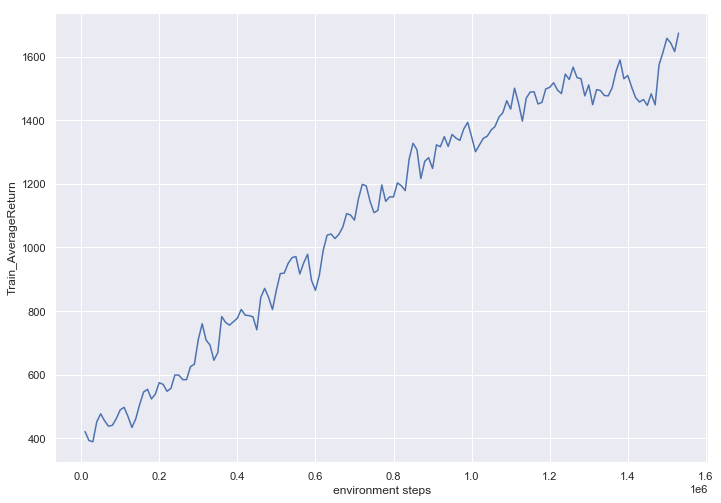

In [8]:
# q1
file_name = find_file('q1_MsPacman')[0]
ax = draw_train(file_name)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# ax.legend(sb_names)
ax.figure.savefig('../../../hw3_submission/q1.jpg')

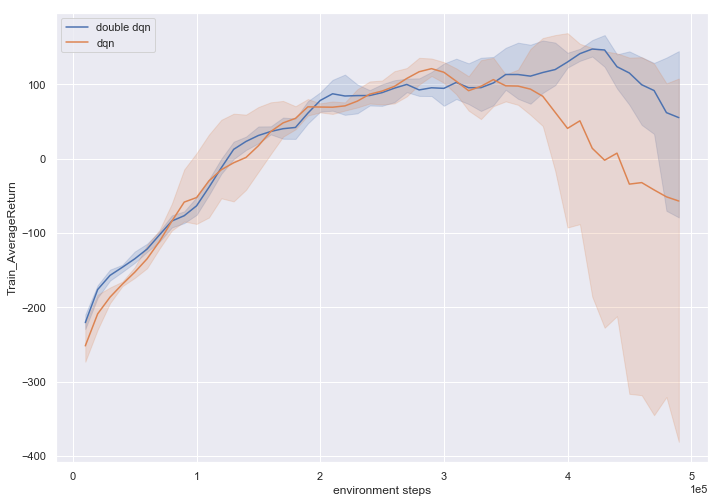

In [9]:
file_names = find_file(['q2_doubledqn_1', 'q2_doubledqn_2', 'q2_doubledqn_3'])
df_list = []
for name in file_names:
    df_list.append(get_section_results_train(name))
df = pd.concat(df_list)
ax = draw_train(None, df)

file_names = find_file(['q2_dqn_1', 'q2_dqn_2', 'q2_dqn_3'])
df_list = []
for name in file_names:
    df_list.append(get_section_results_train(name))
df = pd.concat(df_list)
ax = draw_train(None, df)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.legend(['double dqn', 'dqn'], loc='upper left')
ax.figure.savefig('../../../hw3_submission/q2.jpg')

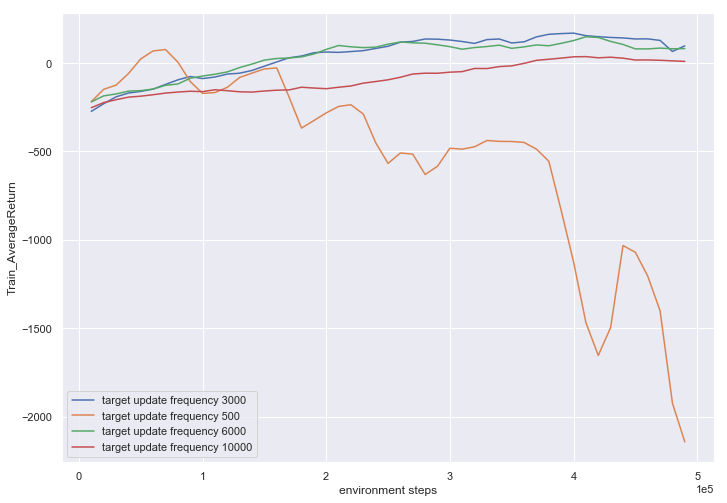

In [12]:
file_names = find_file(['q2_dqn_2', 'q3_target_freq500', 'q3_target_freq6000', 'q3_target_freq10000'])
for name in file_names:
    draw_train(name)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(['target update frequency 3000', 'target update frequency 500', 'target update frequency 6000', 'target update frequency 10000'])
plt.savefig('../../../hw3_submission/q3.jpg')

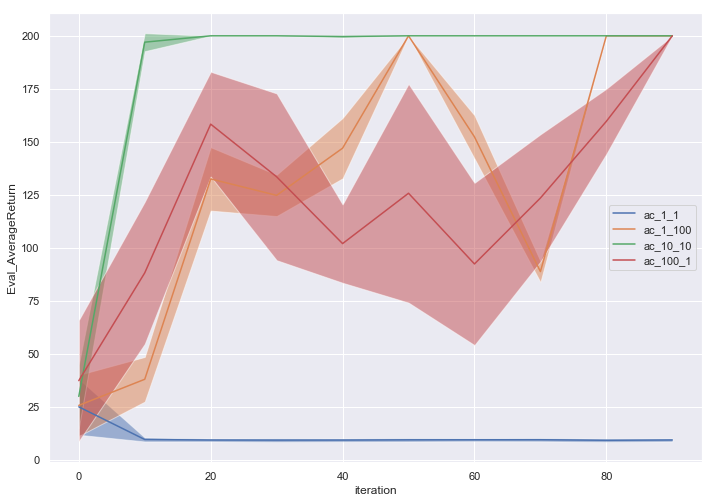

In [13]:
file_names = find_file(['q4_ac_1_1', 'q4_ac_1_100', 'q4_ac_10_10', 'q4_ac_100_1'])
for name in file_names:
    draw_eval(name)
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(['ac_1_1', 'ac_1_100', 'ac_10_10', 'ac_100_1'])
plt.savefig('../../../hw3_submission/q4.jpg')

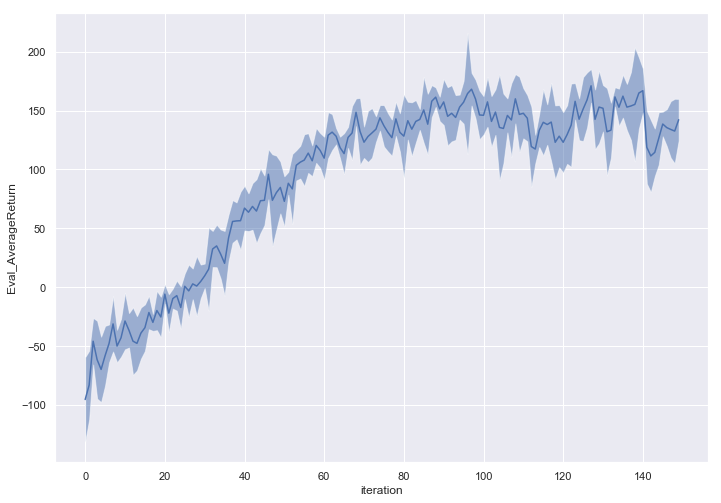

In [14]:
file_name = find_file('q5_10_10_HalfCheetah')[0]
draw_eval(file_name)
plt.savefig('../../../hw3_submission/q5.1.jpg')

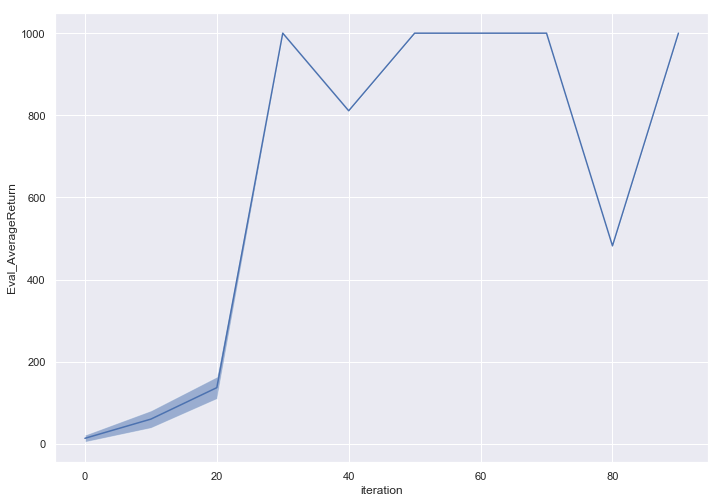

In [15]:
file_name = find_file('q5_10_10_Inv')[0]
draw_eval(file_name)
plt.savefig('../../../hw3_submission/q5.2.jpg')